## Deep Learningモデルのアーキテクチャ比較
Driverless AIで利用可能な[事前学習モデル](https://docs.h2o.ai/driverless-ai/latest-stable/docs/userguide/expert_settings/image_settings.html#tensorflow-image-pretrained-models)の比較  
Experimentは、アーキテクチャの選択以外、デフォルト設定で実施。学習方法は転移学習（特徴量抽出器）

***
### 実行方法

XXX  
XXX

***

In [1]:
import os
#import json

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#!ls dl_archtect_test/result/

In [3]:
def get_resultdata(result_path) -> pd.DataFrame:
    all_files =  os.listdir(result_path)

    ## json fileのみ取得
    result_files = []
    for f in all_files:
        if os.path.splitext(f)[1] == '.json':
            result_files.append(f)

    print('All files: {}, json files: {}'.format(len(all_files), len(result_files)))

    ## 全てのjson fileを結合し、DataFrameとする
    for i, jf in enumerate(result_files):
        if i == 0:
            df = pd.read_json(os.path.join(result_path, jf), orient='index').transpose()
        else:
            df_tmp = pd.read_json(os.path.join(result_path, jf), orient='index').transpose()
            df = pd.concat([df, df_tmp])

    df = df.reset_index()
    print('Result data shape: {}'.format(df.shape))
    return df

***

### Car Dealsデータでの比較
車のPriceを車の特徴と写真から予測（回帰）。[Full Dataset](https://h2o-public-test-data.s3.amazonaws.com/bigdata/server/ImageData/car_deals.zip)  
実験では画像のみを特徴量に利用

In [ ]:
pd.read_csv()

In [11]:
os.path

<module 'posixpath' from '/opt/anaconda3/lib/python3.8/posixpath.py'>

In [4]:
df_car = get_resultdata('dl_archtect_test/result/')
df_car = df_car[df_car['Data_Name']=='car_deals.zip']
df_car.head(3)

All files: 12, json files: 10
Result data shape: (10, 13)


,index,Data_Name,Try,Datasize_mb,N_Observation,N_features,Shape_Train,Shape_Test,Network,Duration_min,Experiment_Size_mb,Acc_Time_Interpret,Metrics
0,0,car_deals.zip,1,749.219669,34571,1,"[25928, 16]","[8643, 16]",densenet121,54.72271,1538.862349,"[7, 2, 8]","{'scorer': 'RMSE', 'val_score': 5650.540527343..."
1,0,car_deals.zip,1,749.219669,34571,1,"[25928, 16]","[8643, 16]",xception,39.420772,2222.24338,"[7, 2, 8]","{'scorer': 'RMSE', 'val_score': 5710.359375, '..."
2,0,car_deals.zip,1,749.219669,34571,1,"[25928, 16]","[8643, 16]",seresnext50,88.177787,2481.342455,"[7, 2, 8]","{'scorer': 'RMSE', 'val_score': 5673.998535156..."


In [5]:
val_score_lst = []
test_score_lst = []
for _, row in df_car.iterrows():
    #print(row['Metrics'])
    val_score_lst.append(row['Metrics']['val_score'])
    test_score_lst.append(row['Metrics']['test_score'])

df_car['val_score_RMSE'] = val_score_lst
df_car['test_score_RMSE'] = test_score_lst

In [6]:
df_car[['Network','Duration_min','Experiment_Size_mb','val_score_RMSE','test_score_RMSE']]

,Network,Duration_min,Experiment_Size_mb,val_score_RMSE,test_score_RMSE
0,densenet121,54.72271,1538.862349,5650.540527,5129.828613
1,xception,39.420772,2222.24338,5710.359375,5170.921387
2,seresnext50,88.177787,2481.342455,5673.998535,5104.689453
3,resnet34,38.185259,2239.956187,5761.494141,5181.739258
4,efficientnetb2,38.534034,1516.891189,5615.804688,5048.395996
5,efficientnetb0,44.510599,1324.197435,5641.707031,5036.506348
6,inception_v3,46.859148,1801.549356,5804.635254,5209.624023
7,resnet50,46.332429,1859.999482,5625.353027,5149.396484
8,seresnet50,44.91441,2519.726963,5552.256348,5114.483887
9,mobilenetv2,39.210557,1239.15507,5767.181152,5200.565430


### 学習時間とサイズ

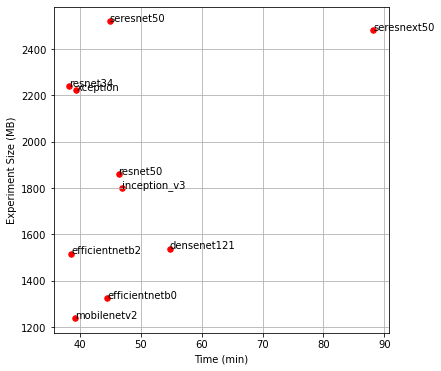

In [7]:
plt.figure(figsize=(6,6))
plt.scatter(df_car['Duration_min'], df_car['Experiment_Size_mb'], s=30, color="red")
plt.xlabel("Time (min)")
plt.ylabel("Experiment Size (MB)")
for i, label in enumerate(df_car['Network']):
    plt.annotate(label, (df_car['Duration_min'][i], df_car['Experiment_Size_mb'][i]))
plt.grid(True)

plt.show()

### 精度比較

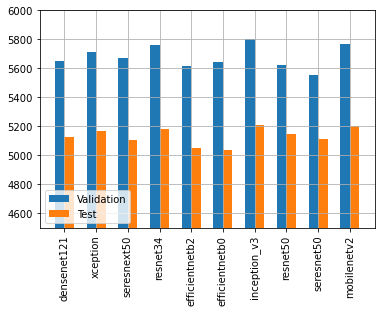

In [10]:
plt.bar(df_car['Network'], df_car['val_score_RMSE'], align="edge", width=-0.3, label='Validation')
plt.bar(df_car['Network'], df_car['test_score_RMSE'], align="edge", width= 0.3, label='Test')
plt.xticks(rotation=90)
plt.legend(loc=3)
plt.grid(True)
plt.ylim(4500, 6000)

plt.show()